#Initialize Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/features.csv'
features = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/stores.csv'
stores = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/train.csv'
train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/sampleSubmission.csv'
sample = pd.read_csv(url)

For each row in the test set (store + department + date triplet), you should predict the weekly sales of that department. The Id column is formed by concatenating the Store, Dept, and Date with underscores (e.g. Store_Dept_2012-11-02).  The file should have a header and looks like the following:

#Data Pre-processing:
* Normalize the data,
* Handle missing values,
* Check for outliers,
* Balance vs. imbalanced dataset,
* Features selection

In [3]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
test 

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [6]:
sample

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [7]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [8]:
feature_train = pd.merge(train,features, on=['Store','Date','IsHoliday'])
feature_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [9]:
train_labels = feature_train['Weekly_Sales']
train_labels

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [10]:
feature_train = feature_train.drop(columns=['Weekly_Sales'])
feature_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [11]:
feature_test = pd.merge(test,features, on=['Store','Date','IsHoliday'])
feature_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


#Handle Missing Values

In [12]:
feature_train.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [13]:
feature_train['MarkDown1'].value_counts()

1.50       102
460.73     102
175.64      93
9264.48     75
1483.17     75
          ... 
196.40      42
243.47      42
512.15      42
318.51      42
945.96      42
Name: MarkDown1, Length: 2277, dtype: int64

In [14]:
feature_train.shape

(421570, 13)

The markdowns are the only features with the training set that have missing values and we will be replacing them with 0 rather than dropping them due to the fact that it would drop about 3/4th of the rows and if we use these features with our testing set, we won't be able to drop them and will need a placeholder value instead. What that value is whether it be 0 or an average will be determined later

In [15]:
feature_train = feature_train.fillna(feature_train.mean())
feature_train

/var/folders/v9/nwhq5rj11bl52lpnqtr3gm5h0000gn/T/ipykernel_2766/3532850509.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_train = feature_train.fillna(feature_train.mean())


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
1,1,2,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
2,1,3,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
3,1,4,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
4,1,5,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,False,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667
421566,45,94,2012-10-26,False,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667
421567,45,95,2012-10-26,False,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667
421568,45,97,2012-10-26,False,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667


In [16]:
feature_train.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

As for the missing value handling for the testing set, we will make changes on these missing values based on our feature selection, as if we find some to be not useful, we will drop them 

In [17]:
feature_test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [18]:
feature_test = feature_test.fillna(feature_test.mean())
feature_test

/var/folders/v9/nwhq5rj11bl52lpnqtr3gm5h0000gn/T/ipykernel_2766/3952800797.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_test = feature_test.fillna(feature_test.mean())


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733


In [19]:
feature_test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

#Normalize Data


In [20]:
feature_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
1,1,2,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
2,1,3,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
3,1,4,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
4,1,5,2010-02-05,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,False,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667
421566,45,94,2012-10-26,False,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667
421567,45,95,2012-10-26,False,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667
421568,45,97,2012-10-26,False,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667


In [21]:
#change date and IsHoliday data type
feature_train['Date'] = pd.to_datetime(feature_train['Date']).astype('int64')
feature_train['IsHoliday'] = feature_train['IsHoliday']*1 
feature_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,1265328000000000000,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
1,1,2,1265328000000000000,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
2,1,3,1265328000000000000,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
3,1,4,1265328000000000000,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
4,1,5,1265328000000000000,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,1351209600000000000,0,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667
421566,45,94,1351209600000000000,0,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667
421567,45,95,1351209600000000000,0,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667
421568,45,97,1351209600000000000,0,58.85,3.882,4018.910000,58.080000,100.000000,211.940000,858.330000,192.308899,8.667


In [22]:
#change date and IsHoliday data type
feature_test['Date'] = pd.to_datetime(feature_test['Date']).astype('int64')
feature_test['IsHoliday'] = feature_test['IsHoliday']*1 
feature_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,1351814400000000000,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
1,1,2,1351814400000000000,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
2,1,3,1351814400000000000,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
3,1,4,1351814400000000000,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
4,1,5,1351814400000000000,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,1374796800000000000,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733
115060,45,94,1374796800000000000,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733
115061,45,95,1374796800000000000,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733
115062,45,97,1374796800000000000,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:


feature_train_scaled = scaler.fit_transform(feature_train)
feature_train_scaled

array([[-1.65819926e+00, -1.41874236e+00, -1.72460527e+00, ...,
        -9.67062652e-15,  1.01877417e+00,  7.82009274e-02],
       [-1.65819926e+00, -1.38594689e+00, -1.72460527e+00, ...,
        -9.67062652e-15,  1.01877417e+00,  7.82009274e-02],
       [-1.65819926e+00, -1.35315142e+00, -1.72460527e+00, ...,
        -9.67062652e-15,  1.01877417e+00,  7.82009274e-02],
       ...,
       [ 1.78325781e+00,  1.66403164e+00,  1.71523026e+00, ...,
        -1.05508269e+00,  5.39003257e-01,  3.79280656e-01],
       [ 1.78325781e+00,  1.72962258e+00,  1.71523026e+00, ...,
        -1.05508269e+00,  5.39003257e-01,  3.79280656e-01],
       [ 1.78325781e+00,  1.76241805e+00,  1.71523026e+00, ...,
        -1.05508269e+00,  5.39003257e-01,  3.79280656e-01]])

In [25]:
feature_test_scaled = scaler.fit_transform(feature_test)
feature_test_scaled

array([[-1.65795594e+00, -1.41372432e+00, -1.68305502e+00, ...,
        -6.09543405e-02,  1.37927787e+00, -2.28457611e-01],
       [-1.65795594e+00, -1.38110457e+00, -1.68305502e+00, ...,
        -6.09543405e-02,  1.37927787e+00, -2.28457611e-01],
       [-1.65795594e+00, -1.34848482e+00, -1.68305502e+00, ...,
        -6.09543405e-02,  1.37927787e+00, -2.28457611e-01],
       ...,
       [ 1.77689441e+00,  1.65253191e+00,  1.69293182e+00, ...,
        -1.05842334e-01,  1.25609330e-13,  1.11152908e-13],
       [ 1.77689441e+00,  1.71777141e+00,  1.69293182e+00, ...,
        -1.05842334e-01,  1.25609330e-13,  1.11152908e-13],
       [ 1.77689441e+00,  1.75039115e+00,  1.69293182e+00, ...,
        -1.05842334e-01,  1.25609330e-13,  1.11152908e-13]])

#Check for outliers

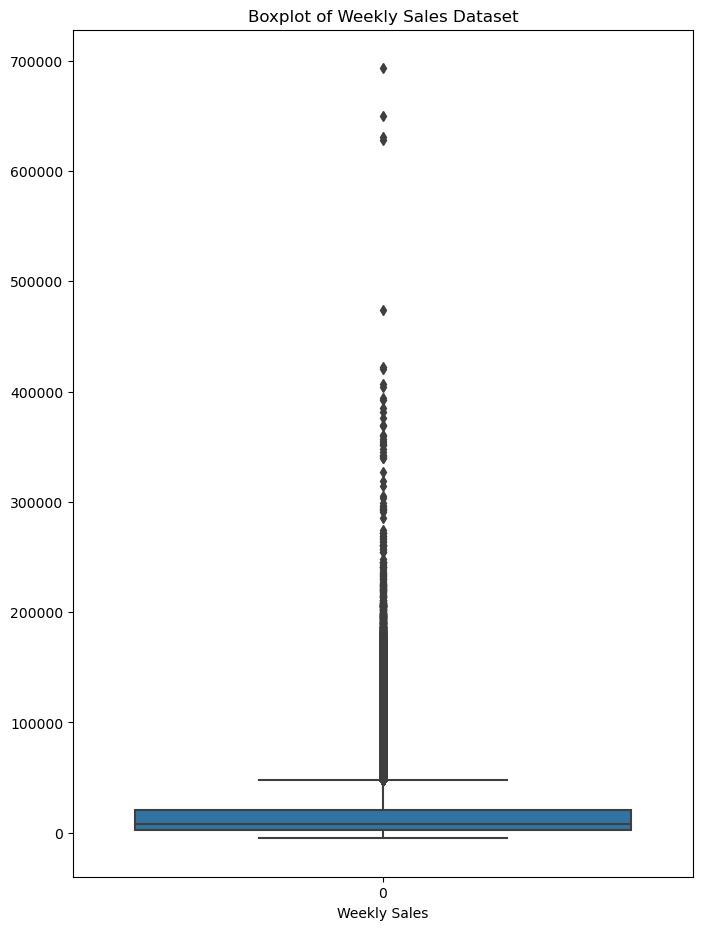

In [26]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 11))
ax = sns.boxplot(data=train_labels)
#ax.set_xticklabels('Weekly Sale')
ax.set_title('Boxplot of Weekly Sales Dataset')
ax.set_xlabel('Weekly Sales')
plt.show()

Removing entries/outliers outside of of +- 3 for z score

In [27]:
import scipy.stats as stats

z = np.abs(stats.zscore(train_labels))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
train_labels_clean = train_labels[(z<2)]

print('New shape:', train_labels_clean.shape)
print('Number of outliers removed: ', (train_labels.shape[0]-train_labels_clean.shape[0]))

New shape: (400657,)
Number of outliers removed:  20913


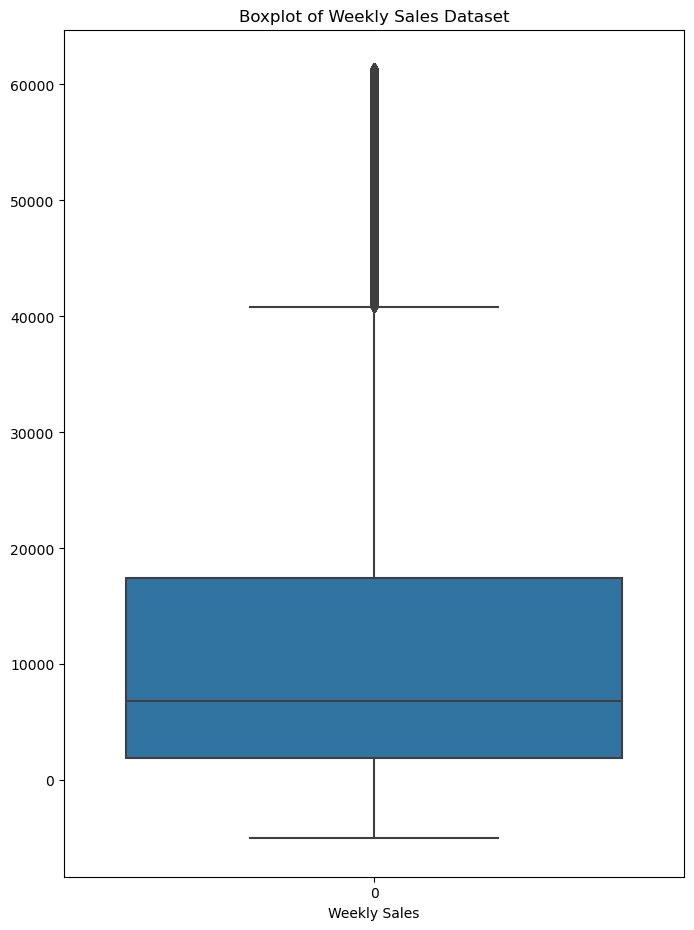

In [28]:
fig, ax = plt.subplots(figsize=(8, 11))
ax = sns.boxplot(data=train_labels_clean)
ax.set_title('Boxplot of Weekly Sales Dataset')
ax.set_xlabel('Weekly Sales')
plt.show()

In [29]:
#filter out the outliers removed for features dataset on the labels dataset 
feature_train_scaled_clean = feature_train_scaled[train_labels_clean.index, :]
print(feature_train_scaled_clean.shape)
print(feature_train_scaled_clean)       

(400657, 13)
[[-1.65819926e+00 -1.41874236e+00 -1.72460527e+00 ... -9.67062652e-15
   1.01877417e+00  7.82009274e-02]
 [-1.65819926e+00 -1.38594689e+00 -1.72460527e+00 ... -9.67062652e-15
   1.01877417e+00  7.82009274e-02]
 [-1.65819926e+00 -1.35315142e+00 -1.72460527e+00 ... -9.67062652e-15
   1.01877417e+00  7.82009274e-02]
 ...
 [ 1.78325781e+00  1.66403164e+00  1.71523026e+00 ... -1.05508269e+00
   5.39003257e-01  3.79280656e-01]
 [ 1.78325781e+00  1.72962258e+00  1.71523026e+00 ... -1.05508269e+00
   5.39003257e-01  3.79280656e-01]
 [ 1.78325781e+00  1.76241805e+00  1.71523026e+00 ... -1.05508269e+00
   5.39003257e-01  3.79280656e-01]]


#Balance vs Imbalanced Dataset

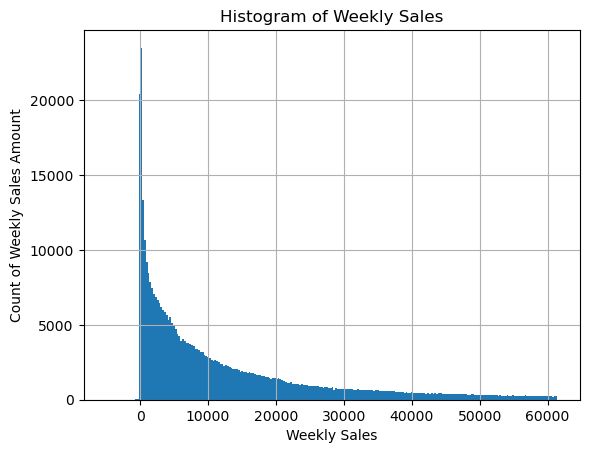

In [30]:
train_labels_clean.hist(bins=250)
plt.title('Histogram of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Count of Weekly Sales Amount')
plt.show()

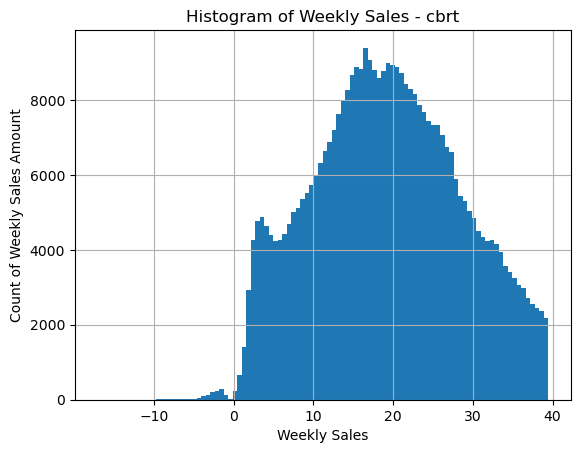

In [31]:
np.cbrt(train_labels_clean).hist(bins=100)
plt.title('Histogram of Weekly Sales - cbrt')
plt.xlabel('Weekly Sales')
plt.ylabel('Count of Weekly Sales Amount')
plt.show()

In [32]:
final_labels = np.cbrt(train_labels_clean)
final_labels

0         29.210713
1         36.988375
2         23.951360
3         34.186415
4         31.823698
            ...    
421565    13.549975
421566    17.328457
421567    38.262602
421568    18.961584
421569    10.249712
Name: Weekly_Sales, Length: 400657, dtype: float64

In [33]:
df_final_features = pd.DataFrame(feature_train_scaled_clean, columns =feature_train.columns)

In [34]:
df_final_features.iloc[:,6:11]

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,8.256600e-15,-1.195846e-14,4.474885e-15,3.640177e-14,-9.670627e-15
1,8.256600e-15,-1.195846e-14,4.474885e-15,3.640177e-14,-9.670627e-15
2,8.256600e-15,-1.195846e-14,4.474885e-15,3.640177e-14,-9.670627e-15
3,8.256600e-15,-1.195846e-14,4.474885e-15,3.640177e-14,-9.670627e-15
4,8.256600e-15,-1.195846e-14,4.474885e-15,3.640177e-14,-9.670627e-15
...,...,...,...,...,...
400652,-6.511127e-01,-6.731498e-01,-2.440817e-01,-8.907072e-01,-1.055083e+00
400653,-6.511127e-01,-6.731498e-01,-2.440817e-01,-8.907072e-01,-1.055083e+00
400654,-6.511127e-01,-6.731498e-01,-2.440817e-01,-8.907072e-01,-1.055083e+00
400655,-6.511127e-01,-6.731498e-01,-2.440817e-01,-8.907072e-01,-1.055083e+00


In [35]:
df_final_features.iloc[:,6:11].mean(axis=1)

0         5.500833e-15
1         5.500833e-15
2         5.500833e-15
3         5.500833e-15
4         5.500833e-15
              ...     
400652   -7.028268e-01
400653   -7.028268e-01
400654   -7.028268e-01
400655   -7.028268e-01
400656   -7.028268e-01
Length: 400657, dtype: float64

In [36]:
df_final_features['MDAverage'] = df_final_features.iloc[:,6:11].mean(axis=1)
df_final_features['MDSum'] = df_final_features.iloc[:,6:11].sum(axis=1)
df_final_features['MDMin'] = df_final_features.iloc[:,6:11].min(axis=1)
df_final_features['MDMax'] = df_final_features.iloc[:,6:11].max(axis=1)

In [37]:
final_features = df_final_features.to_numpy()

In [38]:
final_features.shape[1]

17

In [39]:
df_final_test_features = pd.DataFrame(feature_test_scaled, columns =feature_train.columns)
df_final_test_features['MDAverage'] = df_final_test_features.iloc[:,6:11].mean(axis=1)
df_final_test_features['MDSum'] = df_final_test_features.iloc[:,6:11].sum(axis=1)
df_final_test_features['MDMin'] = df_final_test_features.iloc[:,6:11].min(axis=1)
df_final_test_features['MDMax'] = df_final_test_features.iloc[:,6:11].max(axis=1)
final_test_features = df_final_test_features.to_numpy()
df_final_test_features

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,MDAverage,MDSum,MDMin,MDMax
0,-1.657956,-1.413724,-1.683055,-0.290032,0.073606,-0.816679,-0.086307,0.195956,-0.178653,0.039765,-0.060954,1.379278e+00,-2.284576e-01,-0.018039,-0.090193,-0.178653,0.195956
1,-1.657956,-1.381105,-1.683055,-0.290032,0.073606,-0.816679,-0.086307,0.195956,-0.178653,0.039765,-0.060954,1.379278e+00,-2.284576e-01,-0.018039,-0.090193,-0.178653,0.195956
2,-1.657956,-1.348485,-1.683055,-0.290032,0.073606,-0.816679,-0.086307,0.195956,-0.178653,0.039765,-0.060954,1.379278e+00,-2.284576e-01,-0.018039,-0.090193,-0.178653,0.195956
3,-1.657956,-1.315865,-1.683055,-0.290032,0.073606,-0.816679,-0.086307,0.195956,-0.178653,0.039765,-0.060954,1.379278e+00,-2.284576e-01,-0.018039,-0.090193,-0.178653,0.195956
4,-1.657956,-1.283245,-1.683055,-0.290032,0.073606,-0.816679,-0.086307,0.195956,-0.178653,0.039765,-0.060954,1.379278e+00,-2.284576e-01,-0.018039,-0.090193,-0.178653,0.195956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.776894,1.587292,1.692932,-0.290032,1.181271,0.929055,-0.699340,-0.399539,-0.182356,-0.468935,-0.105842,1.256093e-13,1.111529e-13,-0.371203,-1.856013,-0.699340,-0.105842
115060,1.776894,1.619912,1.692932,-0.290032,1.181271,0.929055,-0.699340,-0.399539,-0.182356,-0.468935,-0.105842,1.256093e-13,1.111529e-13,-0.371203,-1.856013,-0.699340,-0.105842
115061,1.776894,1.652532,1.692932,-0.290032,1.181271,0.929055,-0.699340,-0.399539,-0.182356,-0.468935,-0.105842,1.256093e-13,1.111529e-13,-0.371203,-1.856013,-0.699340,-0.105842
115062,1.776894,1.717771,1.692932,-0.290032,1.181271,0.929055,-0.699340,-0.399539,-0.182356,-0.468935,-0.105842,1.256093e-13,1.111529e-13,-0.371203,-1.856013,-0.699340,-0.105842


#Feature selection

In [40]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [41]:
scores = []

In [42]:
#testing each feature 
for i in range(final_features.shape[1]):
    temp_train = final_features[:,i].reshape(-1, 1)
    model.fit(temp_train, final_labels)
    scores.append(model.score(temp_train,final_labels))

In [43]:
scores

[0.008239404620254076,
 6.589994900174645e-05,
 0.00010443899477119434,
 1.2451069943408832e-05,
 0.0005260309078755077,
 2.4482927718505465e-07,
 0.004692393146491947,
 0.0002663835238188028,
 0.0003927430181522862,
 0.000559754968281756,
 0.0036017100832062,
 0.0010039754106344612,
 0.0004959045584174149,
 0.0053458585937014025,
 0.005345858593700958,
 0.003659733693909817,
 0.0024566540496072653]

In [44]:
len(scores)

17

In [45]:
names=list(df_final_features) #feature names
scores=np.array(scores) 
top=scores.argsort()[-17:][::-1] #get index of top 3 scores

print('Features score ordered: ')
for i in range(len(top)):
  print(i+1,". ", names[top[i]]," with a score of ",scores[top[i]],sep="")

Features score ordered: 
1. Store with a score of 0.008239404620254076
2. MDAverage with a score of 0.0053458585937014025
3. MDSum with a score of 0.005345858593700958
4. MarkDown1 with a score of 0.004692393146491947
5. MDMin with a score of 0.003659733693909817
6. MarkDown5 with a score of 0.0036017100832062
7. MDMax with a score of 0.0024566540496072653
8. CPI with a score of 0.0010039754106344612
9. MarkDown4 with a score of 0.000559754968281756
10. Temperature with a score of 0.0005260309078755077
11. Unemployment with a score of 0.0004959045584174149
12. MarkDown3 with a score of 0.0003927430181522862
13. MarkDown2 with a score of 0.0002663835238188028
14. Date with a score of 0.00010443899477119434
15. Dept with a score of 6.589994900174645e-05
16. IsHoliday with a score of 1.2451069943408832e-05
17. Fuel_Price with a score of 2.4482927718505465e-07


In [46]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [47]:
#Select top feature based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =1)
selector.fit(final_features, final_labels)
df_final_features.columns[selector.get_support()]

Index(['Dept'], dtype='object')

In [48]:
#Select top 3 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =3)
selector.fit(final_features, final_labels)
df_final_features.columns[selector.get_support()]

Index(['Store', 'Dept', 'Unemployment'], dtype='object')

In [49]:
#Select top 5 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =5)
selector.fit(final_features, final_labels)
df_final_features.columns[selector.get_support()]

Index(['Store', 'Dept', 'CPI', 'Unemployment', 'MDMin'], dtype='object')

In [50]:
#Select top 7 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =7)
selector.fit(final_features, final_labels)
df_final_features.columns[selector.get_support()]

Index(['Store', 'Dept', 'MarkDown1', 'MarkDown5', 'CPI', 'Unemployment',
       'MDMin'],
      dtype='object')

In [51]:
#Select top 10 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =10)
selector.fit(final_features, final_labels)
df_final_features.columns[selector.get_support()]

Index(['Store', 'Dept', 'Temperature', 'MarkDown1', 'MarkDown5', 'CPI',
       'Unemployment', 'MDAverage', 'MDSum', 'MDMin'],
      dtype='object')

In [52]:
#Select top 13 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =13)
selector.fit(final_features, final_labels)
top13_SelectK = df_final_features.columns[selector.get_support()]
top13_SelectK

Index(['Store', 'Dept', 'Temperature', 'MarkDown1', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'MDAverage', 'MDSum', 'MDMin',
       'MDMax'],
      dtype='object')

Split Dataset into train and test

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_final_features, final_labels, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320525, 17)
(80132, 17)
(320525,)
(80132,)


In [54]:
x_train.to_csv('Processed Dataset 2/x_train.csv',index=False)
x_test.to_csv('Processed Dataset 2/x_test.csv',index=False)
y_train.to_csv('Processed Dataset 2/y_train.csv',index=False)
y_test.to_csv('Processed Dataset 2/y_test.csv',index=False)

In [55]:
df_final_test_features.to_csv('Processed Dataset 2/Submission Test.csv',index=False)

Split Dataset based on Feature Selection - Top 13

Linear Reg Feature Selection

In [80]:
df_final_features_LinReg = df_final_features.iloc[:,top[0:13]]
df_final_features_LinReg

,Store,MDSum,MDAverage,MDMax,MarkDown1,MDMin,MarkDown5,MarkDown4,CPI,Unemployment,Dept,MarkDown2,MarkDown3
0,-1.658199,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181,-0.278117,1.018774,0.078201,-1.418742,-0.173069,-0.084662
1,-1.658199,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181,-0.278117,1.018774,0.078201,-1.385947,-0.173069,-0.084662
2,-1.658199,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181,-0.278117,1.018774,0.078201,-1.353151,-0.173069,-0.084662
3,-1.658199,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181,-0.278117,1.018774,0.078201,-1.320356,-0.173069,-0.084662
4,-1.658199,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181,-0.278117,1.018774,0.078201,-1.287560,-0.173069,-0.084662
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412717,1.783258,-0.407027,-0.081405,0.236078,0.236078,-0.223697,-0.191187,-0.223697,0.539003,0.379281,1.598441,-0.161646,-0.066576
412718,1.783258,-0.407027,-0.081405,0.236078,0.236078,-0.223697,-0.191187,-0.223697,0.539003,0.379281,1.631236,-0.161646,-0.066576
412719,1.783258,-0.407027,-0.081405,0.236078,0.236078,-0.223697,-0.191187,-0.223697,0.539003,0.379281,1.664032,-0.161646,-0.066576
412720,1.783258,-0.407027,-0.081405,0.236078,0.236078,-0.223697,-0.191187,-0.223697,0.539003,0.379281,1.729623,-0.161646,-0.066576


In [81]:
LinReg_x_train, LinReg_x_test, LinReg_y_train, LinReg_y_test = train_test_split(df_final_features_LinReg, final_labels, test_size=0.2, random_state=42)
print(LinReg_x_train.shape)
print(LinReg_x_test.shape)
print(LinReg_y_train.shape)
print(LinReg_y_test.shape)

(330177, 13)
(82545, 13)
(330177,)
(82545,)


In [88]:
LinReg_x_train.to_csv('Processed Dataset/Lin Reg Feature Selection/x_train.csv',index=False)
LinReg_x_test.to_csv('Processed Dataset/Lin Reg Feature Selection/x_test.csv',index=False)
LinReg_y_train.to_csv('Processed Dataset/Lin Reg Feature Selection/y_train.csv',index=False)
LinReg_y_test.to_csv('Processed Dataset/Lin Reg Feature Selection/y_test.csv',index=False)

SelectKBest Feature Selection 

In [84]:
df_final_features_SelectK = df_final_features[top13_SelectK]
df_final_features_SelectK

,Store,Dept,Temperature,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,MDAverage,MDSum,MDMin,MDMax
0,-1.658199,-1.418742,-0.963798,-0.427943,-0.084662,-0.278117,-0.395181,1.018774,0.078201,-0.271794,-1.358972,-0.427943,-0.084662
1,-1.658199,-1.385947,-0.963798,-0.427943,-0.084662,-0.278117,-0.395181,1.018774,0.078201,-0.271794,-1.358972,-0.427943,-0.084662
2,-1.658199,-1.353151,-0.963798,-0.427943,-0.084662,-0.278117,-0.395181,1.018774,0.078201,-0.271794,-1.358972,-0.427943,-0.084662
3,-1.658199,-1.320356,-0.963798,-0.427943,-0.084662,-0.278117,-0.395181,1.018774,0.078201,-0.271794,-1.358972,-0.427943,-0.084662
4,-1.658199,-1.287560,-0.963798,-0.427943,-0.084662,-0.278117,-0.395181,1.018774,0.078201,-0.271794,-1.358972,-0.427943,-0.084662
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412717,1.783258,1.598441,-0.067219,0.236078,-0.066576,-0.223697,-0.191187,0.539003,0.379281,-0.081405,-0.407027,-0.223697,0.236078
412718,1.783258,1.631236,-0.067219,0.236078,-0.066576,-0.223697,-0.191187,0.539003,0.379281,-0.081405,-0.407027,-0.223697,0.236078
412719,1.783258,1.664032,-0.067219,0.236078,-0.066576,-0.223697,-0.191187,0.539003,0.379281,-0.081405,-0.407027,-0.223697,0.236078
412720,1.783258,1.729623,-0.067219,0.236078,-0.066576,-0.223697,-0.191187,0.539003,0.379281,-0.081405,-0.407027,-0.223697,0.236078


In [85]:
SelectK_x_train, SelectK_x_test, SelectK_y_train, SelectK_y_test = train_test_split(df_final_features_SelectK, final_labels, test_size=0.2, random_state=42)
print(SelectK_x_train.shape)
print(SelectK_x_test.shape)
print(SelectK_y_train.shape)
print(SelectK_y_test.shape)

(330177, 13)
(82545, 13)
(330177,)
(82545,)


In [89]:
SelectK_x_train.to_csv('Processed Dataset/SelectKBest Feature Selection/x_train.csv',index=False)
SelectK_x_test.to_csv('Processed Dataset/SelectKBest Feature Selection/x_test.csv',index=False)
SelectK_y_train.to_csv('Processed Dataset/SelectKBest Feature Selection/y_train.csv',index=False)
SelectK_y_test.to_csv('Processed Dataset/SelectKBest Feature Selection/y_test.csv',index=False)